In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("survey.csv")
que =  ["Sygnatura czasowa","How enjoyable did you find the game? (without DDA)","How difficult did you find the game? (without DDA)","How enjoyable did you find the game? (with DDA)","How difficult did you find the game? (with DDA)","Gameplay with dynamic difficulty enabled provided a better experience.","The AI accurately recognized my emotions.","I forced my facial expressions so that the model was able to recognize my emotions.","Gameplay with dynamic difficulty enabled was easier.","Gameplay with dynamic difficulty enabled was more enjoyable.","I simulated my emotions to decrease the difficulty level of the game.","I simulated my emotions to increase the difficulty level of the game.","The time of the gameplay with dynamic difficulty enabled was shorter.","I would play more games explore emotion recognition.", "I won the game with dynamic difficulty disabled.","I won the game with dynamic difficulty enabled.", "If you know the resolution or color range (HDR, SDR) of your camera used during the study, please enter them below."]


columns_titles = ["time", "EnjoyNA", "DifficultyNA", "EnjoyA", "DifficultyA", "DDAbetter", "modelGood", "Overexpression", "DDAeasier", "DDAenjoy", "simulateEasier", "SimulateHarder", "DDAshorter", "moreAf", "won", "DDAwon",	"cam"]
df=df.reindex(columns=columns_titles)
df.head()

,time,EnjoyNA,DifficultyNA,EnjoyA,DifficultyA,DDAbetter,modelGood,Overexpression,DDAeasier,DDAenjoy,simulateEasier,SimulateHarder,DDAshorter,moreAf,won,DDAwon,cam
0,NaN,4,3,4,3,4,3,4,4,3,5,5,5,5,Yes,Yes,1280x720
1,NaN,3,2,2,2,2,1,4,2,3,1,1,3,5,Yes,Yes,No znam
2,NaN,4,3,4,4,5,3,5,2,4,2,4,2,3,No,No,1280x720
3,NaN,5,4,3,5,4,2,1,1,3,1,1,1,4,Yes,No,NaN
4,NaN,3,1,3,1,5,5,1,5,5,1,1,5,5,Yes,Yes,No


In [2]:
df.describe()

,time,EnjoyNA,DifficultyNA,EnjoyA,DifficultyA,DDAbetter,modelGood,Overexpression,DDAeasier,DDAenjoy,simulateEasier,SimulateHarder,DDAshorter,moreAf
count,0.0,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,NaN,3.292683,2.390244,3.341463,2.780488,3.780488,2.951220,2.951220,3.024390,3.780488,1.951220,2.585366,3.414634,3.707317
std,NaN,1.167131,1.021715,1.153468,1.107073,1.129429,1.182185,1.482417,1.274516,1.193989,1.263947,1.532573,1.413782,1.418519
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,3.000000
50%,NaN,3.000000,2.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,1.000000,2.000000,4.000000,4.000000
75%,NaN,4.000000,3.000000,4.000000,3.000000,5.000000,4.000000,4.000000,4.000000,5.000000,3.000000,4.000000,5.000000,5.000000
max,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]
2


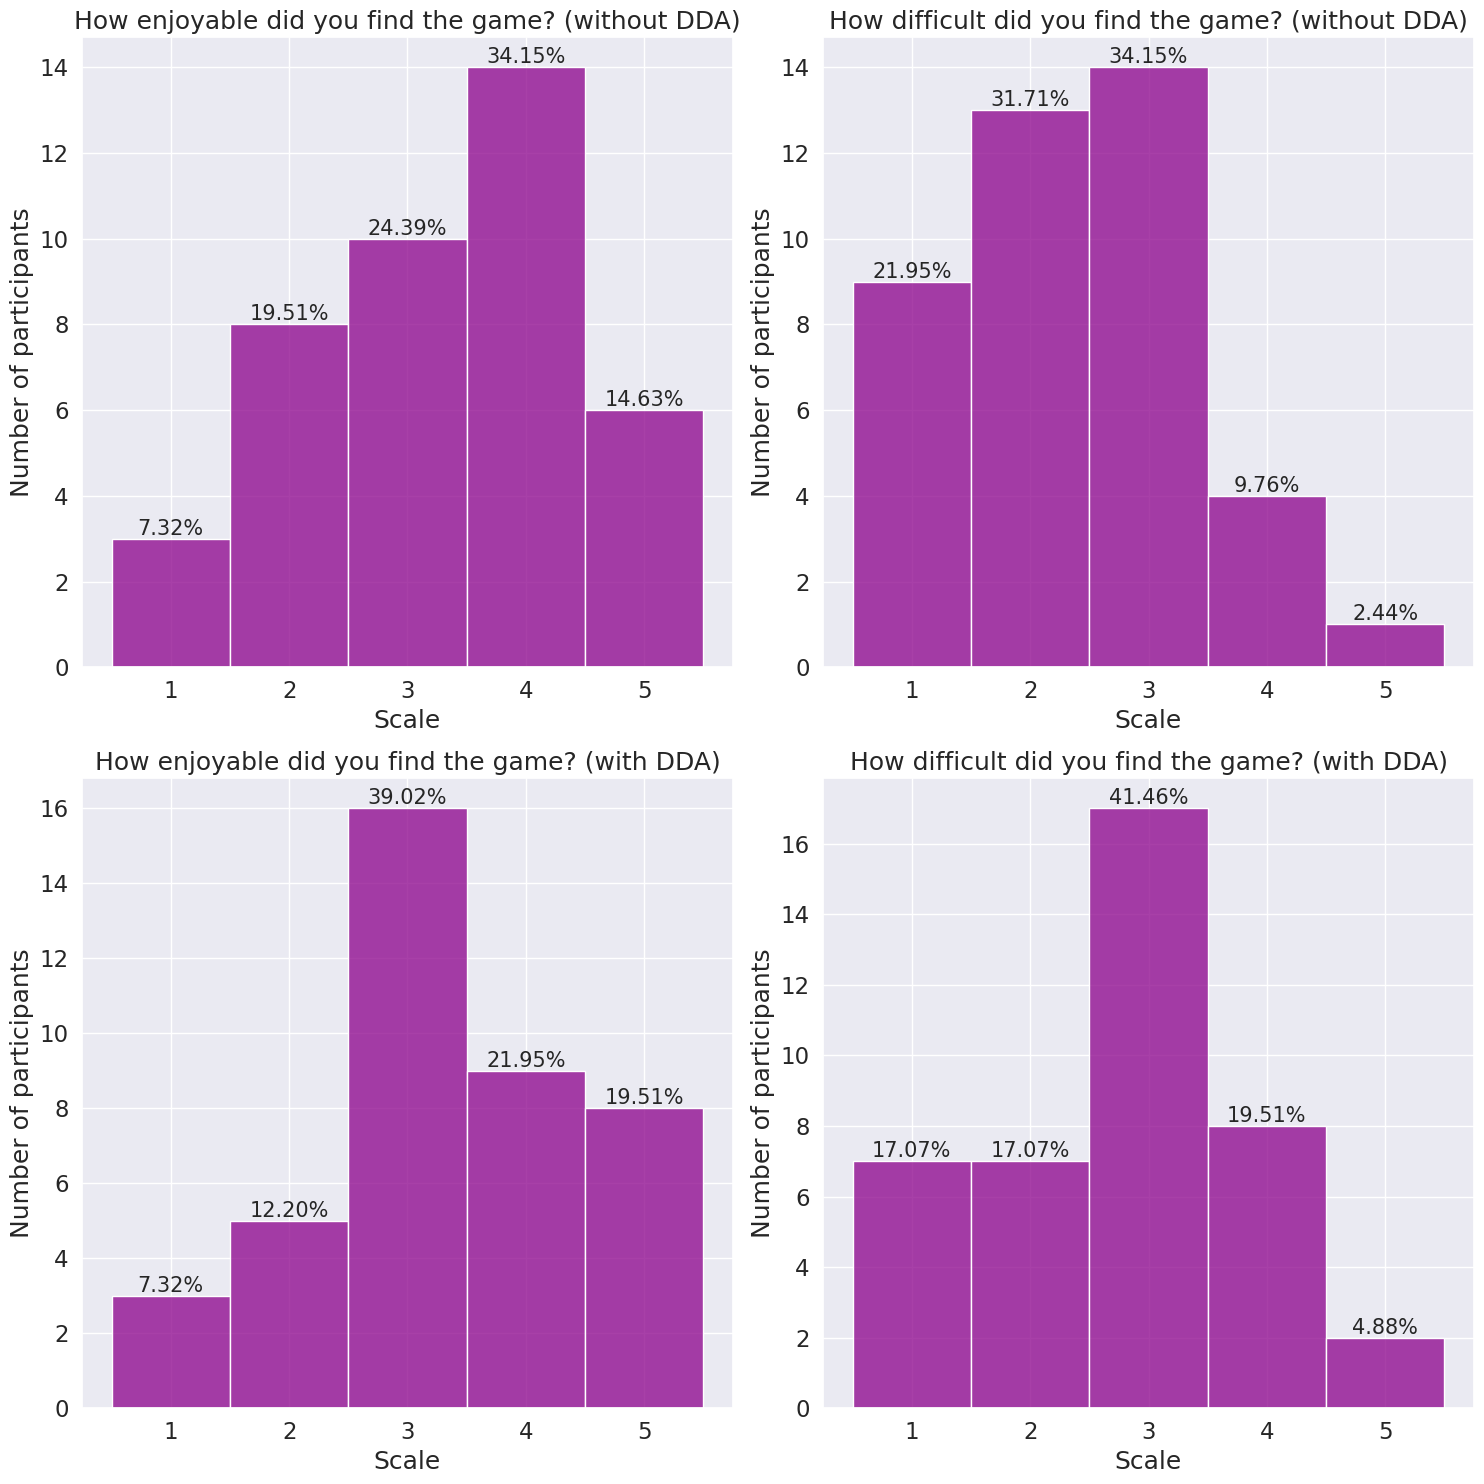

In [4]:
fontsize=10


fig, axs = plt.subplots(2,2,figsize=(15, 15))


names = list(df.columns.values)
# df.hist(column='EnjoyNA', color=['darkmagenta'], bins=[1,2,3,4,5,6], align='left')
print(axs)
print(len(axs))
j = 0
i = 0
cnt = 0
index = 1
while cnt < 4:
    if cnt == 2:
        i = 1
    j = cnt % 2 
    label = names[index]
    sns.set(font_scale=1.5)
    sns.set_theme()
    sns.color_palette(['orchid'])
    sns.histplot(data=df, x=label, color='darkmagenta', bins=[1,2,3,4,5,6], ax=axs[i, j], discrete=True)
    fig.tight_layout()
    # plt.title(que[index])
    axs[i, j].title.set_text(que[index])
    axs[i, j].set_xlabel("Scale")
    axs[i, j].set_ylabel("Number of participants")

    labels = [1, 2, 3, 4, 5]
    plt.gca().set_xticks(labels)
    # sns.barplot(data=df, palette=['orchid', 'darkmagenta', 'cornflowerblue']) 
    # plt.savefig("class_test_data.pdf", format="pdf", bbox_inches="tight")

    count = [0, 0, 0, 0, 0]
    for k in range(df[label].shape[0]):
        for m in range(len(count)):
            if df[label][k] == m+1:
                count[m] = count[m] + 1
        
    for k in range(len(count)):
        count[k] = round(count[k] / df[label].shape[0] * 100,2)

    for k, patch in enumerate(axs[i,j].patches):
        percentage = '{:.2f}%'.format(count[k])
        axs[i,j].annotate(percentage, (patch.get_x() + patch.get_width() / 2, patch.get_height()), ha='center', va='bottom', fontsize=15)
    
    index = index + 1
    cnt = cnt + 1
plt.show()

fig.savefig("qyn.pdf", format="pdf", bbox_inches="tight")

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]
5


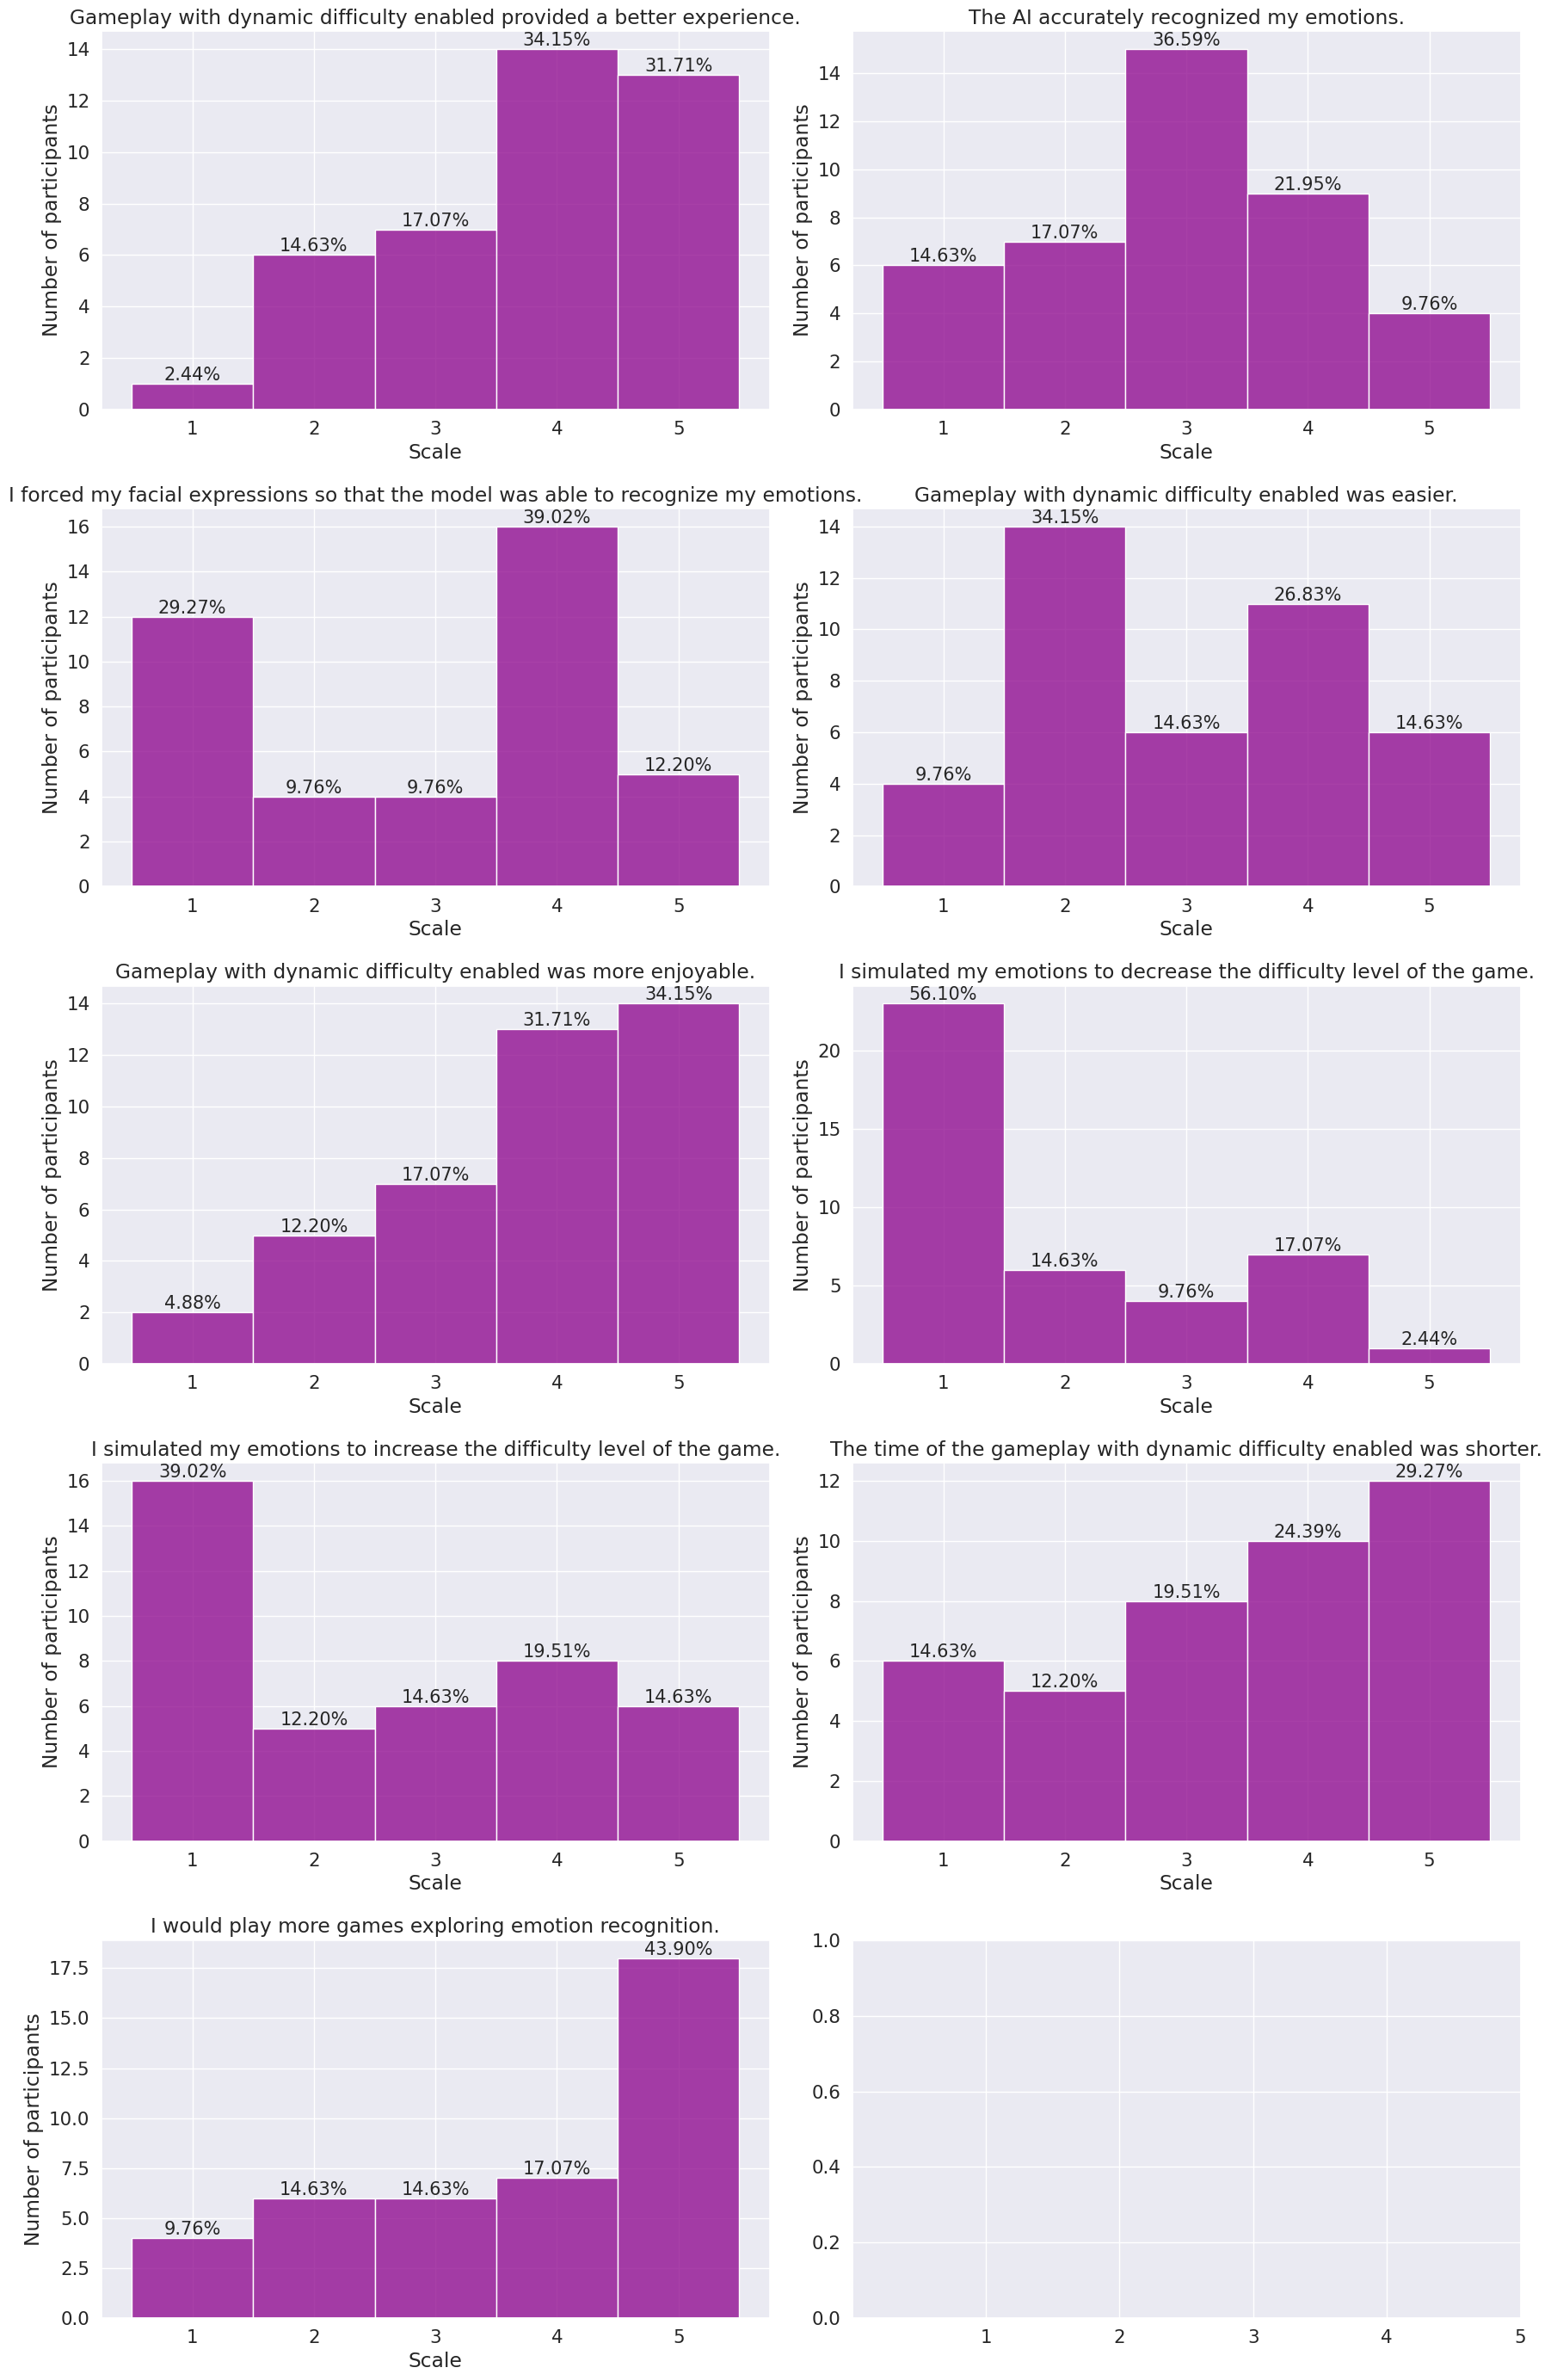

In [12]:
fontsize=10


fig, axs = plt.subplots(5,2,figsize=(18, 28))
sns.set_theme()
sns.color_palette(['orchid'])

names = list(df.columns.values)
# df.hist(column='EnjoyNA', color=['darkmagenta'], bins=[1,2,3,4,5,6], align='left')
print(axs)
print(len(axs))
j = 0
i = 0
cnt = 0
index = 5
while cnt < 9:
    if cnt % 2 == 0 and cnt != 0:
        i = i + 1
    j = cnt % 2 
    label = names[index]
    sns.set(font_scale=1.5)
    sns.histplot(data=df, x=label, color='darkmagenta', bins=[1,2,3,4,5,6], ax=axs[i, j], discrete=True)
    fig.tight_layout()
    # plt.title(que[index])
    axs[i, j].title.set_text(que[index])
    axs[i, j].set_xlabel("Scale")
    axs[i, j].set_ylabel("Number of participants")

    labels = [1, 2, 3, 4, 5]
    plt.gca().set_xticks(labels)
    # sns.barplot(data=df, palette=['orchid', 'darkmagenta', 'cornflowerblue']) 
    # plt.savefig("class_test_data.pdf", format="pdf", bbox_inches="tight")

    count = [0, 0, 0, 0, 0]
    for k in range(df[label].shape[0]):
        for m in range(len(count)):
            if df[label][k] == m+1:
                count[m] = count[m] + 1
        
    for k in range(len(count)):
        count[k] = round(count[k] / df[label].shape[0] * 100,2)

    for k, patch in enumerate(axs[i,j].patches):
        percentage = '{:.2f}%'.format(count[k])
        axs[i,j].annotate(percentage, (patch.get_x() + patch.get_width() / 2, patch.get_height()), ha='center', va='bottom', fontsize=15)
    
    index = index + 1
    cnt = cnt + 1
plt.show()

fig.savefig("q1.pdf", format="pdf", bbox_inches="tight")

[<Axes: > <Axes: >]
2


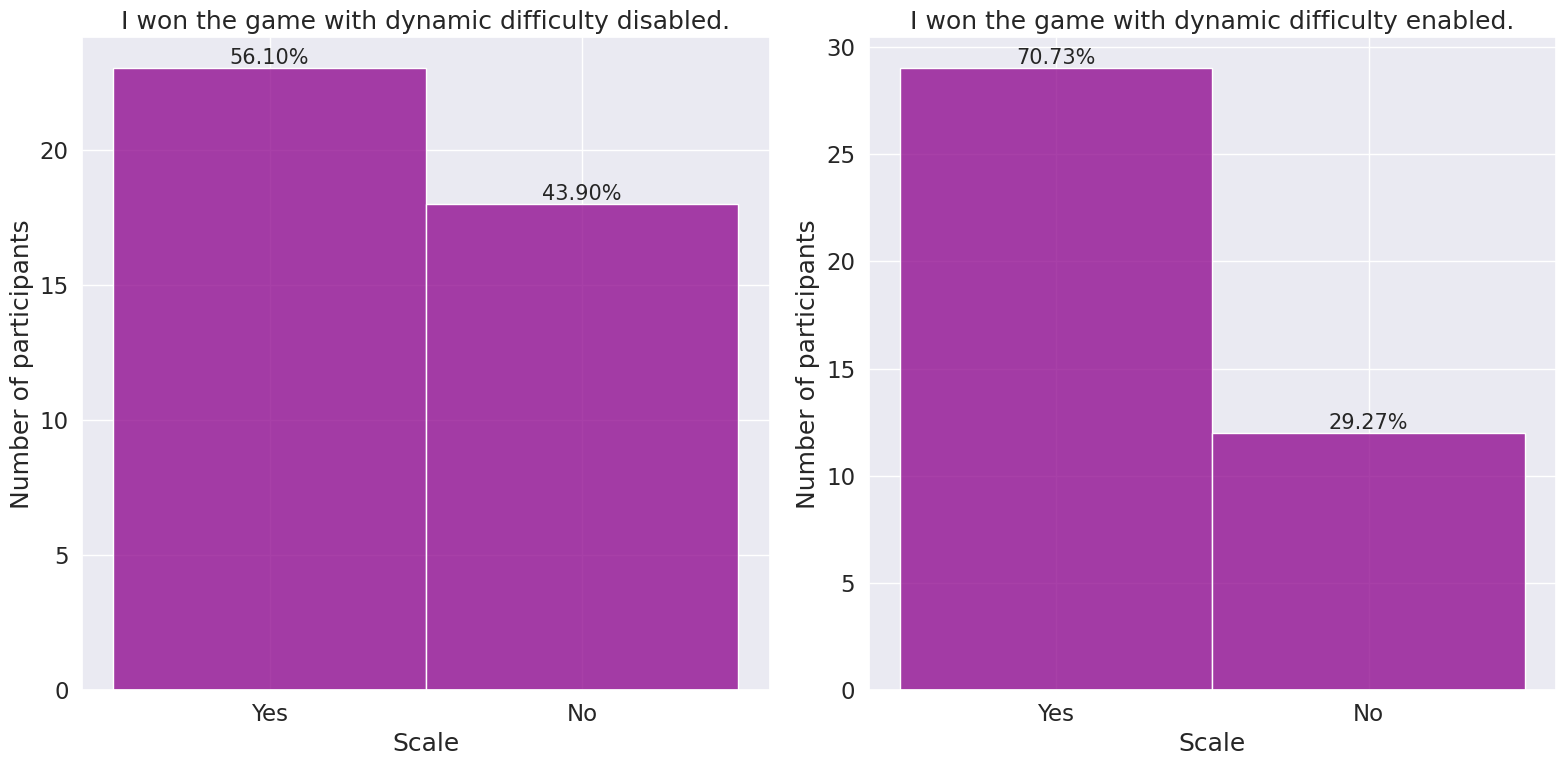

In [86]:
fontsize=10

fig, axs = plt.subplots(1,2,figsize=(16, 8))
sns.set_theme()
sns.color_palette(['orchid'])

names = list(df.columns.values)
# df.hist(column='EnjoyNA', color=['darkmagenta'], bins=[1,2,3,4,5,6], align='left')
print(axs)
print(len(axs))
j = 0
i = 0
cnt = 0
index = 14
while cnt < 2:
    if cnt == 1:
        i = 1 
    label = names[index]
    sns.set(font_scale=1.5)
    sns.histplot(data=df, x=label, color='darkmagenta', bins=[1,2], ax=axs[i], discrete=True)
    fig.tight_layout()
    # plt.title(que[index])
    axs[i].title.set_text(que[index])
    axs[i].set_xlabel("Scale")
    axs[i].set_ylabel("Number of participants")

    # labels = [1, 2, 3, 4, 5]
    # plt.gca().set_xticks(labels)
    # sns.barplot(data=df, palette=['orchid', 'darkmagenta', 'cornflowerblue']) 
    # plt.savefig("class_test_data.pdf", format="pdf", bbox_inches="tight")

    count = [0, 0]
    for k in range(df[label].shape[0]):
        if df[label][k] == 'Yes':
            count[0] = count[0] + 1
        else: 
            count[1] = count[1] + 1

    
    for k in range(len(count)):
        count[k] = round(count[k] / df[label].shape[0] * 100,2)

    for k, patch in enumerate(axs[i].patches):
        percentage = '{:.2f}%'.format(count[k])
        axs[i].annotate(percentage, (patch.get_x() + patch.get_width() / 2, patch.get_height()), ha='center', va='bottom', fontsize=15)
    
    index = index + 1
    cnt = cnt + 1
plt.show()

fig.savefig("q13-14.pdf", format="pdf", bbox_inches="tight")

In [87]:
# H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal)
# H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest
# Are means the same across groups in the data?
# https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/
from scipy.stats import f_oneway
print(f_oneway(df['EnjoyNA'],df['EnjoyA'])) # p > 0.05 no basis to reject the null hypothesis
print(f_oneway(df['DifficultyNA'],df['DifficultyA']))

F_onewayResult(statistic=0.03623188405797102, pvalue=0.8495196138286591)
F_onewayResult(statistic=2.7512090274046206, pvalue=0.10109687564090095)


In [21]:
# check for normality with shapiro wilk
from scipy.stats import shapiro

print(shapiro(df['EnjoyNA']))
print(shapiro(df['EnjoyA']))
print(shapiro(df['DifficultyNA']))
print(shapiro(df['DifficultyA']))

# Ho(Accepted): Sample is from the normal distributions.(Po>0.05)
# Ha(Rejected): Sample is not from the normal distributions.
print("Samples are not from a normal distribution")

ShapiroResult(statistic=0.9076248407363892, pvalue=0.002805904019623995)
ShapiroResult(statistic=0.9018315076828003, pvalue=0.001878726645372808)
ShapiroResult(statistic=0.8952946066856384, pvalue=0.001207861234433949)
ShapiroResult(statistic=0.9001952409744263, pvalue=0.001680268906056881)
Samples are not from a normal distribution


In [23]:
from scipy.stats import kruskal
# The null hypothesis (H0): The median is the same for all the data groups.
# The alternative hypothesis: (Ha): The median is not equal for all the data groups.
print(kruskal(df['EnjoyNA'],df['EnjoyA']))
print(kruskal(df['DifficultyNA'],df['DifficultyA']))

KruskalResult(statistic=0.011108472803149411, pvalue=0.9160610027593744)
KruskalResult(statistic=2.942250972125068, pvalue=0.0862904051207865)


In [24]:
import scipy.stats as stats
# conduct the Wilcoxon-Signed Rank Test
print(stats.wilcoxon(df['EnjoyNA'],df['EnjoyA']))
print(stats.wilcoxon(df['DifficultyNA'],df['DifficultyA']))

# Ho(Accepted): Sample distributions are equal.
# Ha(Rejected): Sample distributions are not equal.
# p-value<alpha=0.05 which means the sample is of the same distribution and the sample distributions are equal

WilcoxonResult(statistic=87.0, pvalue=0.7353166906373405)
WilcoxonResult(statistic=105.5, pvalue=0.037093538865294914)


/home/mcas/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
